## Chua's Circuit: Analysis and Implementation
Joseph Kristofik  - Sam Smit
<table style="border: 1px solid #ffffff; width: 100%">
  <tr>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff "><img src=img\attractiver.png></td>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff "><img src=img\cir_phys.jpg></td>
  </tr>
  <tr>
    <td style="border:1px solid #ffffff " colspan="3"></td>
  </tr>
</table>


## Background    


As we've discussed prior, the study of chaotic systems began with a system described by Lorenz, featuring three independent variables and two terms introducing nonlinearity. This system had something of a difficult physical interpretation, and all analysis was performed computationally[1][2]. In the fall of 1983, Leon Chua proposed his eponymous circuit while visiting the University of Weseda. Chua's circuit is a quintessential example of an aperiodic oscillator, popular both for its simplicity (it can be made with easily obtainable,relatively cheap components and is relatively easy to construct) and elegance in implementation (it exhibits the characteristic sensitive dependence of a chaotic oscillator). These factors make Chua's circuit an attractive system for studying the properties of chaotic phenomena in general. Our own investigation is presented here, beginning with the equations describing the circuit.

<img src=img\chua_circ.svg.png>
Figure: 1 The vanilla Chua's circuit


## Equations & Derivation for Chua's Circuit

$$
\begin{aligned}
\text{Chua's Circuit Equation}: && \frac{d{x}}{d{t}}=\alpha[y-x-f(x)] && \frac{d{y}}{d{t}}=\frac{x-y+Rz}{RC_2} && \frac{dz}{dt}=-\beta z \\
 \text{where:  } && \text{f(x) is some nonlinear function of x}
\end{aligned}
$$

The equations of a Chua's circuit above with $f(x)$ represented by a 3-element piecewise linear equation. Such functions may also come in the form of sinusoids and other nonlinear functions: The $f(x)$ cited above is simply one example. Our implementation in actuality has a five-equation piecewise linear description; however, because the contribution of two of these are relatively small it approximates the $f(x)$ above very well. $E$ in this equation is a function of the op-amps response with regards to the rail voltage of the op-amps.
<img src=img\circ_act.png>
Figure 2: An implementation of Chua's circuit which we use here. 

In our implementation, the inductor is replaced with a gyrator circuit, and the nonlinear element is represented as a parallel combination of negative impedance convertors due seperately to Siderskiy and Kennedy respectively[3][4][5]. We use similar values to those chosen in Kennedy's papper for the nonlinear element, and in the gyrator we choose components to simulate an 18-Henry inductor. The piecewise function that this nonlinear element creates is somewhat sawtooth in appearance. With these factors in mind, we do a full derivation:

We will use nodal analysis, Ohm's Law, and Kirchoff's Current law to extract the desired differential equations from the circuit, as well as some simplifications that can be found in the references. We define X to be the voltage between $C_2$ and $R$ with respect to ground, Y to be the voltage between $C_1$ and $R$ with respect to ground, and Z to be the current flowing through the gyrator.

First, we will do the nodal equation at Y. We assume all three branch currents flow into Y. Thus, we have:

$ \frac{X - Y}{R} - C_{2}\frac{dY}{dt} + Z = 0 \\$

Which simplifies to 

$ \frac{dY}{dt} = \left( \frac{X - Y}{R} - Z \right) / C_{2} \\$

and this is as desired.
Then we do nodal analysis at X and simplify a bit to get:

$ \frac{dX}{dt} = \left( \frac{Y - X}{R} + \frac{X}{R_{1}} + \frac{X}{R_{4}} \right) / C_{1} \\$

Which, when accounting for the behavior of the Chua's Diode as a an approximately 3-piece nonlinear resistor, becomes 

$ \frac{dX}{dt} = \left( \frac{Y - X}{R} + f(X) \right) / C_{1} \\$

where f(X) is 
$ f(X) = G_{b}X + 0.5(G_{a} - G_{b}) (|X + E| - |X - E|) \\$
and $G_{a}$, $G_{b}$, and $E$ can be calculated from the component values.

Finally, since we are treating the gyrator as an inductor, we take the characteristic inductor equation to get:

$ Y = L \frac{di}{dt} = L \frac{dZ}{dt} \implies \frac{dZ}{dt} = - \frac{Y}{L} \\$

where L depends on the component values inside the gyrator. Thus, the shown circuit is described by the defining equations of the Chua System.


## Implementation, Simulation, and Comparison

Below we have the raw data and simulated data for comparison. We see that the Chua system is in fact accurately portrayed by our physical model, as expected. Note that the DC offset of the opamp is somewhat visible in the output. This can be compensated for with additional circuitry, but does not in the end alter the resulting chaotic behaviour of the system and as such will be ignored from here on.

In [51]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw python code to generate this notebook is hidden. <a href="javascript:code_toggle()">Show?</a>.''')

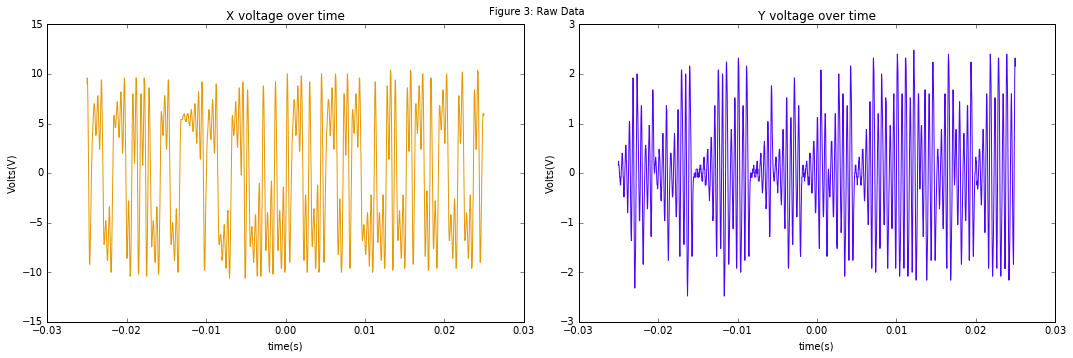

In [54]:


import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

#Arrays for data
xcor=[]
ycor=[]

#Import and dissect TDS2014B oscilloscope output

ka=[]
with open('wav/TEK0001.CSV', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        ka.append(row)
for i in range(len(ka)):
    kaw=ka[i]
    xcor.append([float(kaw[3]),float(kaw[4])])

ka2=[]
with open('wav/TEK0000.CSV', 'rt') as csvfile2:
    reader2 = csv.reader(csvfile2, delimiter=',')
    for row in reader2:
        ka2.append(row)
for i in range(len(ka2)):
    kaw2=ka2[i]
    ycor.append([float(kaw2[3]),float(kaw2[4])])
plt.rcParams['figure.figsize']=(15,5)

#Plots!
f, (ax1,ax2) = plt.subplots(1,2)
#ax1.set_axis_bgcolor(204,255,204)
ax1.plot([x for [x,y] in xcor], [y for [x,y] in xcor],color=(.9,.6,.01))
ax2.plot([x for [x,y] in ycor], [y for [x,y] in ycor],color=(.3,.02,1))

#Labels and unimportant bookkeeping bits
ax1.set_xlabel("time(s)")
ax2.set_xlabel("time(s)")
ax1.set_ylabel("Volts(V)")
ax2.set_ylabel("Volts(V)")
ax1.set_title("X voltage over time")
ax2.set_title("Y voltage over time")
f.tight_layout()
f.suptitle("Figure 3: Raw Data")
f.savefig("img/cir_plt.png")

In [56]:
from scipy.integrate import odeint as ode
from scipy.integrate import ode as ode2
from mpl_toolkits.mplot3d import Axes3D


def f(k):
    m = -1.2
    mm = -.7
    return (k*mm)+0.5*(m-mm)*(abs(k+2)-abs(k-2))


def chua(v,t,alpha=14.,beta=29.):
    x = v[0]
    y = v[1]
    z = v[2]
    
    dx = alpha*(y-x-f(x))
    dy = x-y+z
    dz = -beta*y
    
    return [dx,dy,dz]


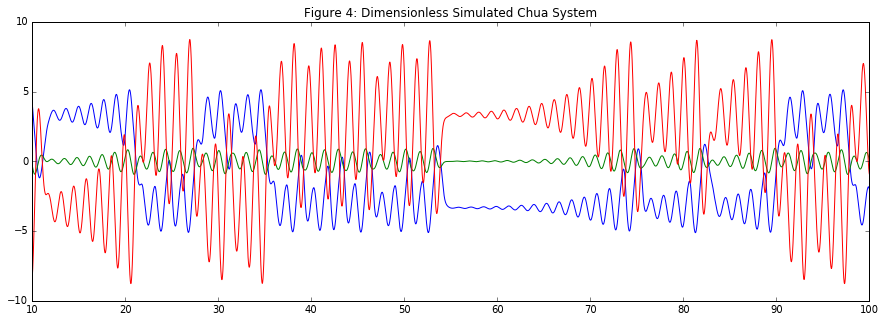

In [57]:
x0,y0,z0=[-.4,.5,-.1]

t = np.linspace(0,100,100000)
soln=ode(chua,[x0,y0,z0],t)
cut=10000
x,y,z=[soln[cut:,0],soln[cut:,1],soln[cut:,2]]
plo=plt.plot(t[cut:],x),plt.plot(t[cut:],y),plt.plot(t[cut:],z)
titl=plt.title("Figure 4: Dimensionless Simulated Chua System")

We see that the simulated Chua System shows a very similar combination of waveforms in the two figures above. Below, we see that the two dimensional projections of the attractor show similar shape.

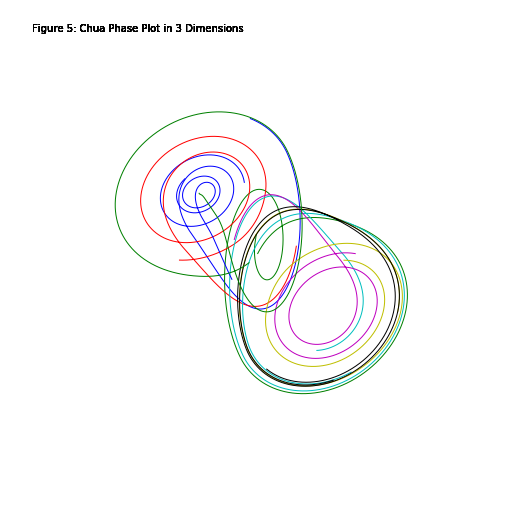

In [58]:
import numpy.random as r
fig = plt.figure(figsize=(9,9))
t = np.linspace(0,32,100000)
for k in range(9):
    x0,y0,z0=[r.randint(-2,2)+r.rand(),r.randint(-2,2)+r.rand(),r.randint(-2,2)+r.rand()]
    soln=ode(chua,[x0,y0,z0],t)
    x,y,z=[soln[cut:,0],soln[cut:,1],soln[cut:,2]]
    ax = fig.gca(projection='3d')
    plt.plot(x[:cut],y[:cut],zs=z[:cut])
    plt.axis('off')
    #plt.title('Dimensionless Simulated 3D Plot of the Chua System')
    ax.text2D(0.05, 0.95, "Figure 5: Chua Phase Plot in 3 Dimensions", transform=ax.transAxes)
plt.savefig("img/attractive"+str(x0)+".png",bbox_inches='tight')


<table style="border: 1px solid #ffffff; width: 100%">
  <tr>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0007.BMP) A</td>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0010.BMP) B</td>
    <td style="border-collapse: collapse; border-spacing: 0; border:1px solid #ffffff ">![image](files\img\TEK0013.BMP) C</td>
  </tr>
  <tr>
    <td style="border:1px solid #ffffff " colspan="3"> Figure 6: A & B both show the attractor seen in Chua's circuit. Note that there is some clipping near bottom of the attractor C shows the waveform as the system approaches chaotic.</td>
  </tr>
</table>


## Applications

Besides strictly being an academic curiosity, Chua's circuit does in fact find a few useful applications. Oscillators oscillate, as the name would imply; Thus any such oscillator can easily serve as a waveform source in a synthesizer for those more artistically inclined.

A subject of current research involves using synchronized Chua's circuits to for encryption. The chaotic nature of the Chua's system is able to mask a signal such that only knowledge of the initial conditions can be used to recover the original input. Current challenges with these approaches include ensuring that the synced circuits have minimal variance in parameters (as we know, by definition minor changes lead to large long term differences in he equation outputs and as such requires extremely precise circuit construction). Despite the appeal, there has been no as of yet use in a commercial product or production system.

[1] - E. Lorenz, “Deterministic non-periodic flows,” J. Atmos. Ser., vol. 20, pp.130-141, 1963. 

[2] - Matsumoto, Takashi (December 1984). "A Chaotic Attractor from Chua's Circuit" (PDF). IEEE Transactions on Circuits and Systems (IEEE). CAS-31 (12): 1055–1058. Retrieved 2008-05-01

[3] - Kennedy, M. P. (1993). Three steps to chaos. II. A Chua's circuit primer. Circuits and Systems I: Fundamental Theory and Applications, IEEE Transactions on, 40(10), 657-674.

[4] - Kılıç, R. (2010). A practical guide for studying Chua's circuits. Hackensack: World Scientific.

[5] - Siderskiy, M. V., Mohammed, M. A. A., & Kapila, V. Chua’s Circuit for Experimenters Using Readily Available Parts from a Hobby Electronics Store.

[6] - Irimiciuc, Stefan-Andrei, Ovidiu Vasilovici, and Dan-Gheorghe Dimitriu. "Chua's Circuit: Control and Synchronization." International Journal of Bifurcation and Chaos 25.04 (2015): 1550050.

[7] - Cruz-Hernández, César, and Hazael Serrano-Guerrero. "Cryptosystems based on synchronized Chua’s circuits." Proceedings of the 16th IFAC world congress, Prague, Czech Republic. 2005.

[8] - Jiang, Hui-yan, and Chong Fu. "An image encryption scheme based on Lorenz chaos system." Natural Computation, 2008. ICNC'08. Fourth International Conference on. Vol. 4. IEEE, 2008.

[9] - Marco, Anderson Gonçalves, Alexandre Souto Martinez, and Odemir Martinez Bruno. "Fast, parallel and secure cryptography algorithm using Lorenz's attractor." International Journal of Modern Physics C 21.03 (2010): 365-382.
